In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # This adjusts the cofiguration of the plots that we'll be creating.


# Read the data

df = pd.read_csv('movies.csv')

#### Our aim here is to find the correlation between the features

In [2]:
# let's see if there are any missing data


for col in df.columns:
    percent_missing = round(np.mean(df[col].isnull()),4)
    print('{} - {} %'.format(col, percent_missing))

name - 0.0 %
rating - 0.01 %
genre - 0.0 %
year - 0.0 %
released - 0.0003 %
score - 0.0004 %
votes - 0.0004 %
director - 0.0 %
writer - 0.0004 %
star - 0.0001 %
country - 0.0004 %
budget - 0.2831 %
gross - 0.0246 %
company - 0.0022 %
runtime - 0.0005 %


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# dropping these missing values for now

df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [7]:
# First off, let's convert the 'budget' and 'gross' columns to int.

df['budget'] = df['budget'].astype(int)
df['gross'] = df['gross'].astype(int)
df['votes'] = df['votes'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   int32  
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int32  
 12  gross     5421 non-null   int32  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(2), int32(3), int64(1), object(9)
memory usage: 614.1+ KB


In [8]:
df.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.005938e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.853059e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,-2.147484e+09,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.068684e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.675463e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.119284e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.069522e+09,271.000000


Gross Revenue cannot be -ve. We need to change it to absolute value. We shall also extract the exact year of release.

In [9]:
df['released'].unique()

array(['June 13, 1980 (United States)', 'July 2, 1980 (United States)',
       'June 20, 1980 (United States)', ...,
       'February 14, 2020 (United States)',
       'February 21, 2020 (United States)',
       'August 28, 2020 (United States)'], dtype=object)

In [10]:
df['released_year'] = df['released'].str.extract(pat = '([0-9]{4})')

In [11]:
df['released_year'].unique()

array(['1980', '1981', '1984', '1983', '1982', '1987', '1985', '1986',
       '1990', '1988', '1992', '1989', '1991', '1999', '1994', '1993',
       '1995', '2001', '1996', '2000', '1997', '1998', '2002', '2003',
       '2004', '2019', '2014', '2005', '2006', '2007', '2008', '2010',
       '2009', '2013', '2011', '2016', '2015', '2012', '2017', '2018',
       '2020'], dtype=object)

In [12]:
# df[df['name'].str.contains('Golden')]

df[df['gross']<=0]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0,1997
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0,2019


In [13]:
df['gross'] = df['gross'].apply(abs)

In [14]:
df[df['gross']<=0]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year


In [15]:
df.sort_values(by=['gross'], inplace=False, ascending= False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2147483648,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2147483648,Twentieth Century Fox,194.0,1997
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2147483648,Twentieth Century Fox,162.0,2009
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [16]:
# if you want to view the whole data withing the output box

## pd.set_option('display.max_rows', None)

In [17]:
# Drop any duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


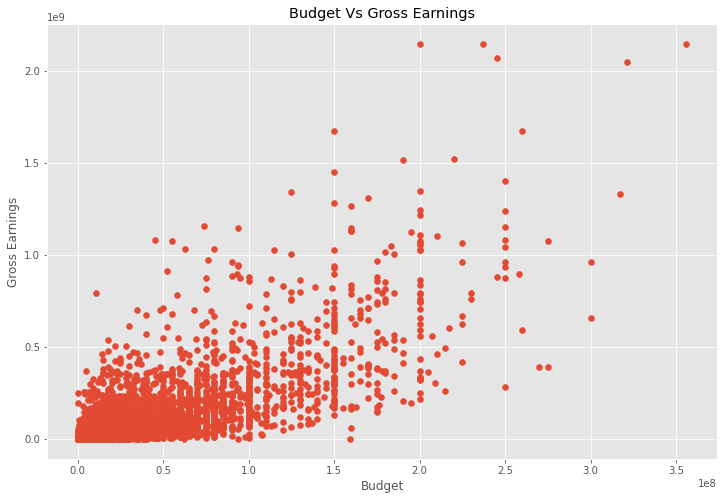

In [18]:
# Visualization time

### scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

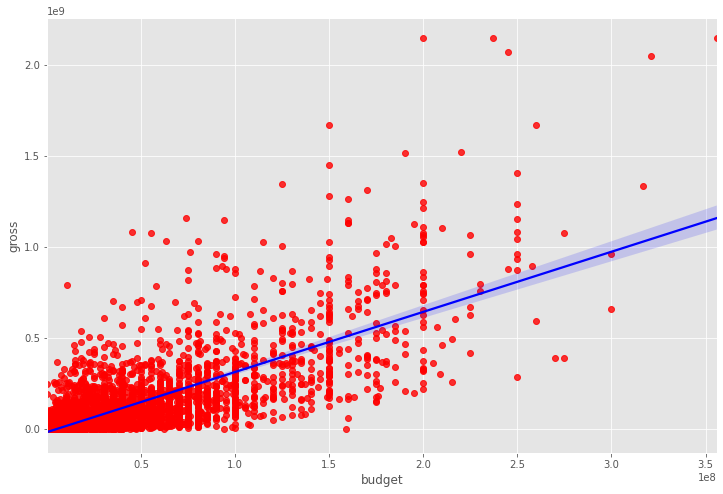

In [19]:
# plot the budget vs gross with seaborn

sns.regplot(x= 'budget', y='gross', data = df, scatter_kws = {"color": "red"}, line_kws= {"color": "blue"})

In [20]:
# Let's start looking at correlation : Pearson, Kendall, Spearman

df.corr(method= 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.277715,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.224092,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.618978,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.744928,0.318695
gross,0.277715,0.224092,0.618978,0.744928,1.000000,0.275789
runtime,0.075077,0.414068,0.352303,0.318695,0.275789,1.000000


<AxesSubplot:title={'center':'Correlation Metric for numeric features'}>

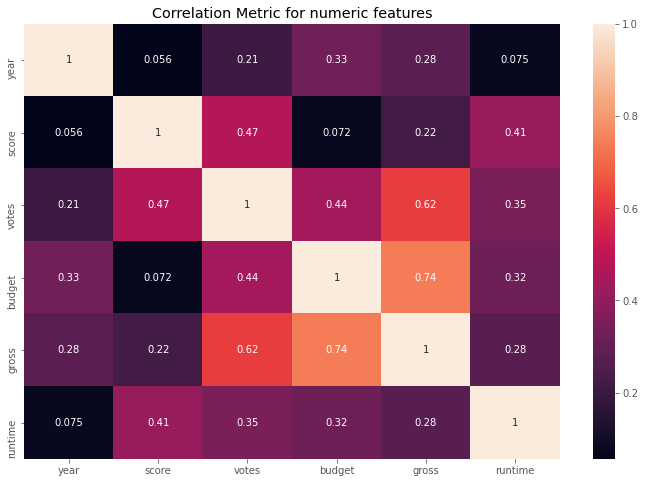

In [21]:
correlation_matrix = df.corr(method= 'pearson')

plt.title('Correlation Metric for numeric features')

sns.heatmap(correlation_matrix, annot = True)

In [22]:
# Look at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [23]:
# numerize all the categorical values

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0,40
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0,40
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0,40
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0,40


<AxesSubplot:title={'center':'Correlation Metric for numeric features'}>

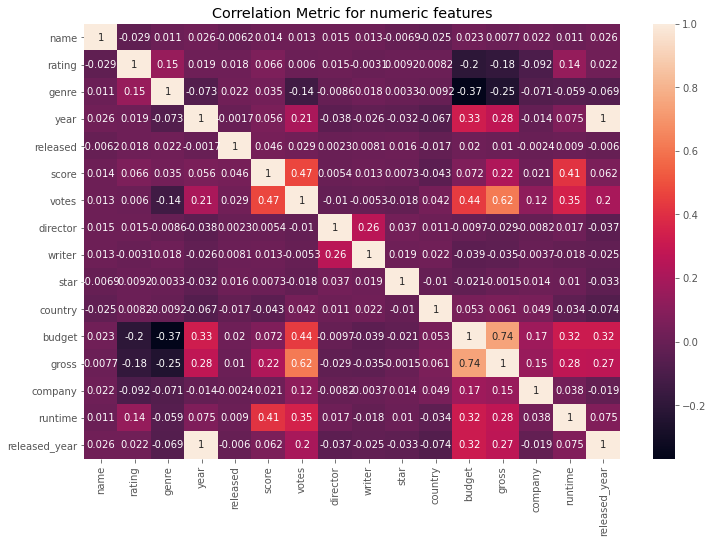

In [24]:
correlation_matrix = df_numerized.corr(method= 'pearson')

plt.title('Correlation Metric for numeric features')

sns.heatmap(correlation_matrix, annot = True)

In [25]:
# Now, we shall find the correlation in another way where we can extract correlated pairs
# We shall use the unstack() function for that

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name           name             1.000000
               rating          -0.029234
               genre            0.010996
               year             0.025542
               released        -0.006152
                                  ...   
released_year  budget           0.320312
               gross            0.272036
               company         -0.018806
               runtime          0.075294
               released_year    1.000000
Length: 256, dtype: float64

In [26]:
# to get the sorted list of each corr_pair

sorted_pairs = corr_pairs.sort_values()

sorted_pairs


genre          budget          -0.368523
budget         genre           -0.368523
gross          genre           -0.246831
genre          gross           -0.246831
rating         budget          -0.203946
                                  ...   
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
Length: 256, dtype: float64

In [27]:
# Now to see individual pairs having high correlation

high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

gross          votes            0.618978
votes          gross            0.618978
budget         gross            0.744928
gross          budget           0.744928
year           released_year    0.998726
released_year  year             0.998726
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
dtype: float64

**We can see that votes and budget have the highest correlation to gross earnings**

**Company has low correlation**
